In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df_full = pd.read_csv('~/Downloads/wordbank_instrument_data-Full_Child_By_Word.csv')

In [169]:
df_full.head()

downloaded   data_id item_kind category item_id item_definition  \
0  2025-10-02  396587.0      word   sounds  item_1         baa baa   
1  2025-10-02  396587.0      word   sounds  item_2       choo choo   
2  2025-10-02  396587.0      word   sounds  item_3  cockadoodledoo   
3  2025-10-02  396587.0      word   sounds  item_4            grrr   
4  2025-10-02  396587.0      word   sounds  item_5            meow   

    english_gloss       uni_lemma  child_id  age     value  
0         baa baa         baa baa     62793   25  produces  
1       choo choo       choo choo     62793   25  produces  
2  cockadoodledoo  cockadoodledoo     62793   25  produces  
3            grrr            grrr     62793   25  produces  
4            meow            meow     62793   25  produces

In [170]:
df_full.shape

(7247121, 11)

In [171]:
words_full = df_full['item_definition'].unique()
len(words_full)

797

In [172]:
df = pd.read_csv('~/Downloads/wordbank_item_data.csv')

In [173]:
df.head()

downloaded  item_id item_definition category    16    17    18    19    20  \
0  2025-10-02        1         baa baa   sounds  0.46  0.52  0.55  0.66  0.69   
1  2025-10-02        2       choo choo   sounds  0.27  0.32  0.39  0.51  0.56   
2  2025-10-02        3  cockadoodledoo   sounds  0.13  0.10  0.14  0.22  0.22   
3  2025-10-02        4            grrr   sounds  0.54  0.50  0.54  0.63  0.61   
4  2025-10-02        5            meow   sounds  0.49  0.47  0.55  0.67  0.69   

     21    22    23    24    25    26    27    28    29    30  
0  0.70  0.66  0.78  0.78  0.78  0.79  0.82  0.89  0.80  0.79  
1  0.60  0.67  0.71  0.76  0.84  0.81  0.85  0.92  0.85  0.88  
2  0.29  0.31  0.37  0.43  0.45  0.49  0.53  0.70  0.54  0.58  
3  0.65  0.63  0.73  0.76  0.76  0.75  0.80  0.90  0.79  0.80  
4  0.75  0.76  0.80  0.86  0.88  0.88  0.91  0.96  0.91  0.92

In [174]:
df.columns

Index(['downloaded', 'item_id', 'item_definition', 'category', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30'],
      dtype='object')

In [175]:
df.drop(columns=['downloaded'], inplace=True)
df.columns

Index(['item_id', 'item_definition', 'category', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'],
      dtype='object')

In [176]:
words = df['item_definition'].unique()
len(words)

680

In [177]:
# words that occur in full but not in item data
missing_words = [el for el in words_full if el not in words]
print(len(missing_words))
missing_words[0:10]

117


['does your child ever talk about past events or people who are not present?',
 "does your child ever talk about something that's going to happen in the future?",
 'does your child talk a bout objects that are not present?',
 'does your child understand if you ask for something that is not in the room?',
 'does your child ever pick up or point to an object and name an absent person to whom the object belongs?',
 'splural',
 'spossess',
 'ing',
 'ed',
 'children']

In [178]:
'children' in words

False

In [179]:
baa_baa = df.iloc[0,:]
baa_baa

item_id                  1
item_definition    baa baa
category            sounds
16                    0.46
17                    0.52
18                    0.55
19                    0.66
20                    0.69
21                     0.7
22                    0.66
23                    0.78
24                    0.78
25                    0.78
26                    0.79
27                    0.82
28                    0.89
29                     0.8
30                    0.79
Name: 0, dtype: object

<Axes: xlabel='Age (Months)', ylabel='Proportion Acquired'>

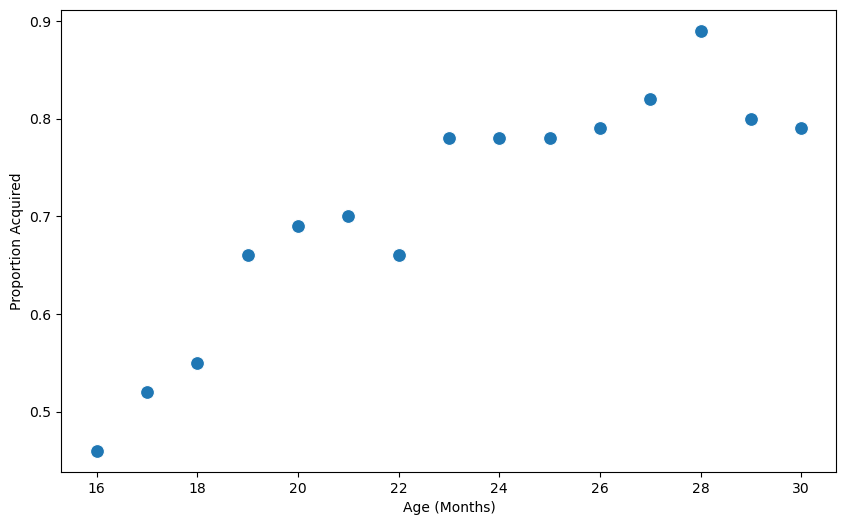

In [180]:
age_cols = [str(a) for a in range(16, 31)]
baa_baa_proportions = baa_baa.loc[age_cols]

# 3. Create a DataFrame suitable for plotting with seaborn
baa_baa_df = pd.DataFrame({
    # Age is the index label, which we convert to integer for plotting
    'Age (Months)': baa_baa_proportions.index.astype(int),
    # Proportion is the value associated with each age
    'Proportion Acquired': baa_baa_proportions.values
})

# 4. Create the Scatterplot
plt.figure(figsize=(10, 6))

# Scatterplot for the data points
sns.scatterplot(
    x='Age (Months)',
    y='Proportion Acquired',
    data=baa_baa_df,
    s=100  # Size of the points
)

In [181]:
# from sklearn.linear_model import LogisticRegression

# baa_baa_model = LogisticRegression()
# baa_baa_model.fit(baa_baa_df[['Age (Months)']], baa_baa_df['Proportion Acquired'])
# preds = baa_baa_model.predict_proba(baa_baa_df[['Age (Months)']])[:, 1]
# preds

In [182]:
print(baa_baa_df)

    Age (Months) Proportion Acquired
0             16                0.46
1             17                0.52
2             18                0.55
3             19                0.66
4             20                0.69
5             21                 0.7
6             22                0.66
7             23                0.78
8             24                0.78
9             25                0.78
10            26                0.79
11            27                0.82
12            28                0.89
13            29                 0.8
14            30                0.79


Fitted Parameters for Acquisition Trajectory:
----------------------------------------
  Maximum Proportion (L): 0.8370
  Growth Rate (k): 0.2886
  Model-based Median AoA (x0): 15.29 months


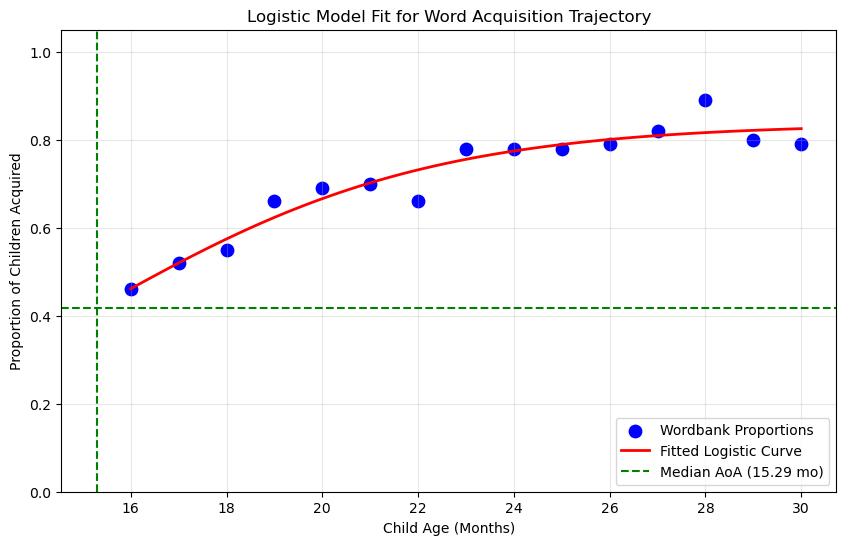

In [183]:
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 2. Define the Logistic (Sigmoid) Function ---
def sigmoid(age, L, k, x0):
    """
    L: Maximum value (asymptote).
    k: Growth rate (steepness).
    x0: Inflection point (Median Age of Acquisition estimate).
    """
    return L / (1 + np.exp(-k * (age - x0)))

# --- 3. Extract Data for Fitting ---
X = baa_baa_df['Age (Months)'].values  # Independent variable (Age)
Y = baa_baa_df['Proportion Acquired'].values # Dependent variable (Proportion)

# --- 4. Perform the Curve Fit ---
# p0 provides initial "guesses" for the parameters (L, k, x0).
popt, pcov = curve_fit(sigmoid, X, Y, p0=[1.0, 0.5, 22])

# Extract the optimal fitted parameters
L_fit, k_fit, x0_fit = popt

# --- 5. Print Results ---
print("Fitted Parameters for Acquisition Trajectory:")
print("-" * 40)
print(f"  Maximum Proportion (L): {L_fit:.4f}")
print(f"  Growth Rate (k): {k_fit:.4f}")
print(f"  Model-based Median AoA (x0): {x0_fit:.2f} months")

# --- 6. Plot the Fitted Curve vs. Raw Data ---
X_fit = np.linspace(X.min(), X.max(), 100)
preds = sigmoid(X_fit, L_fit, k_fit, x0_fit)

plt.figure(figsize=(10, 6))

# Raw Data Points
plt.scatter(X, Y, label='Wordbank Proportions', color='blue', s=80)

# Fitted Curve
plt.plot(X_fit, preds, label='Fitted Logistic Curve', color='red', linestyle='-', linewidth=2)

# Highlight the estimated AoA
plt.axvline(x=x0_fit, color='green', linestyle='--', label=f'Median AoA ({x0_fit:.2f} mo)')
plt.axhline(y=L_fit / 2, color='green', linestyle='--')

plt.title('Logistic Model Fit for Word Acquisition Trajectory')
plt.xlabel('Child Age (Months)')
plt.ylabel('Proportion of Children Acquired')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [184]:
x0_fit

np.float64(15.287484138413065)

In [185]:
df

item_id item_definition          category    16    17    18    19    20  \
0          1         baa baa            sounds  0.46  0.52  0.55  0.66  0.69   
1          2       choo choo            sounds  0.27  0.32  0.39  0.51  0.56   
2          3  cockadoodledoo            sounds  0.13  0.10  0.14  0.22  0.22   
3          4            grrr            sounds  0.54  0.50  0.54  0.63  0.61   
4          5            meow            sounds  0.49  0.47  0.55  0.67  0.69   
..       ...             ...               ...   ...   ...   ...   ...   ...   
675      676         because  connecting_words  0.00  0.02  0.01  0.03  0.03   
676      677             but  connecting_words  0.00  0.02  0.02  0.03  0.02   
677      678              if  connecting_words  0.00  0.02  0.02  0.02  0.01   
678      679              so  connecting_words  0.00  0.03  0.02  0.03  0.03   
679      680            then  connecting_words  0.00  0.02  0.01  0.02  0.02   

       21    22    23    24    25    26    27    28    29    30  
0    0.70  0.66  0.78  0.78  0.78  0.79  0.82  0.89  0.80  0.79  
1    0.60  0.67  0.71  0.76  0.84  0.81  0.85  0.92  0.85  0.88  
2    0.29  0.31  0.37  0.43  0.45  0.49  0.53  0.70  0.54  0.58  
3    0.65  0.63  0.73  0.76  0.76  0.75  0.80  0.90  0.79  0.80  
4    0.75  0.76  0.80  0.86  0.88  0.88  0.91  0.96  0.91  0.92  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
675  0.03  0.06  0.10  0.10  0.13  0.21  0.25  0.36  0.35  0.42  
676  0.03  0.06  0.07  0.07  0.10  0.14  0.19  0.26  0.30  0.33  
677  0.01  0.03  0.04  0.04  0.07  0.09  0.12  0.18  0.21  0.22  
678  0.04  0.07  0.08  0.10  0.12  0.15  0.23  0.29  0.29  0.33  
679  0.02  0.02  0.07  0.07  0.08  0.15  0.19  0.27  0.28  0.30  

[680 rows x 18 columns]

In [186]:
# Now do it for all the words and store the parameters of the fitted sigmoid and the median age of acquisition

from scipy.optimize import curve_fit

# --- 1. Define the Logistic (Sigmoid) Function (Same as before) ---
def sigmoid(age, L, k, x0):
    """
    L: Maximum proportion (asymptote).
    k: Growth rate.
    x0: Inflection point / Median AoA.
    """
    return L / (1 + np.exp(-k * (age - x0)))

# --- 2. Define the Column Range for Fitting (Ensure this matches your DataFrame) ---
AGE_COLUMNS = [str(a) for a in range(16, 31)]

# --- 3. The Revised Core Fitting Function ---
def calculate_sigmoid_params(row):
    """
    Fits the sigmoid curve to a single row and returns all three parameters (L, k, x0).
    """
    X = np.array([int(col) for col in AGE_COLUMNS])
    Y = row[AGE_COLUMNS].values
    p0 = [1.0, 0.5, 22] # Initial guesses (L, k, x0)

    try:
        # curve_fit returns the optimal parameters (popt)
        popt, pcov = curve_fit(sigmoid, X, Y, p0=p0, maxfev=5000)
        
        # Return all three fitted parameters
        return pd.Series(popt, index=['L_fit', 'k_fit', 'x0_fit'])
        
    except RuntimeError:
        # If the fit fails, return a row of NaN values
        print(f"Warning: Curve fit failed for row/word. Returning NaN.")
        return pd.Series([np.nan, np.nan, np.nan], index=['L_fit', 'k_fit', 'x0_fit'])

# --- 4. Apply the Function to the DataFrame ---

# NOTE: This assumes 'df' is your full Wordbank DataFrame with columns '16' through '30'.

print("Calculating all sigmoid parameters for all words...")

# Use .apply(axis=1) and assign the result directly to new columns.
# The result of the function is a pandas Series, which pandas unpacks into columns.
df[['L_fit', 'k_fit', 'Median AoA (Months)']] = df.apply(calculate_sigmoid_params, axis=1)

print("\nCalculation Complete.")


Calculating all sigmoid parameters for all words...

Calculation Complete.


In [187]:
# Display the key columns
df[['item_definition', 'L_fit', 'k_fit', 'Median AoA (Months)']+AGE_COLUMNS]

item_definition     L_fit     k_fit  Median AoA (Months)    16    17  \
0           baa baa  0.836973  0.288620            15.287484  0.46  0.52   
1         choo choo  0.911990  0.321404            18.728405  0.27  0.32   
2    cockadoodledoo  0.677007  0.288617            22.228966  0.13  0.10   
3              grrr  0.939366  0.142435            15.136755  0.54  0.50   
4              meow  0.965333  0.260716            16.495982  0.49  0.47   
..              ...       ...       ...                  ...   ...   ...   
675         because  0.555123  0.417114            27.288015  0.00  0.02   
676             but  0.572983  0.356900            28.909156  0.00  0.02   
677              if  0.329210  0.428794            28.004520  0.00  0.02   
678              so  0.481306  0.356024            27.593888  0.00  0.03   
679            then  0.365849  0.522549            26.704733  0.00  0.02   

       18    19    20    21    22    23    24    25    26    27    28    29  \
0    0.55  0.66  0.69  0.70  0.66  0.78  0.78  0.78  0.79  0.82  0.89  0.80   
1    0.39  0.51  0.56  0.60  0.67  0.71  0.76  0.84  0.81  0.85  0.92  0.85   
2    0.14  0.22  0.22  0.29  0.31  0.37  0.43  0.45  0.49  0.53  0.70  0.54   
3    0.54  0.63  0.61  0.65  0.63  0.73  0.76  0.76  0.75  0.80  0.90  0.79   
4    0.55  0.67  0.69  0.75  0.76  0.80  0.86  0.88  0.88  0.91  0.96  0.91   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
675  0.01  0.03  0.03  0.03  0.06  0.10  0.10  0.13  0.21  0.25  0.36  0.35   
676  0.02  0.03  0.02  0.03  0.06  0.07  0.07  0.10  0.14  0.19  0.26  0.30   
677  0.02  0.02  0.01  0.01  0.03  0.04  0.04  0.07  0.09  0.12  0.18  0.21   
678  0.02  0.03  0.03  0.04  0.07  0.08  0.10  0.12  0.15  0.23  0.29  0.29   
679  0.01  0.02  0.02  0.02  0.02  0.07  0.07  0.08  0.15  0.19  0.27  0.28   

       30  
0    0.79  
1    0.88  
2    0.58  
3    0.80  
4    0.92  
..    ...  
675  0.42  
676  0.33  
677  0.22  
678  0.33  
679  0.30  

[680 rows x 19 columns]

In [188]:
df[df['item_definition']=='because']

item_id item_definition          category   16    17    18    19    20  \
675      676         because  connecting_words  0.0  0.02  0.01  0.03  0.03   

       21    22  ...   24    25    26    27    28    29    30     L_fit  \
675  0.03  0.06  ...  0.1  0.13  0.21  0.25  0.36  0.35  0.42  0.555123   

        k_fit  Median AoA (Months)  
675  0.417114            27.288015  

[1 rows x 21 columns]

In [189]:
# --- 1. Define the Logistic (Sigmoid) Function (Required to draw the fitted curve) ---
def sigmoid(age, L, k, x0):
    """L: Max prop, k: Growth rate, x0: Median AoA."""
    return L / (1 + np.exp(-k * (age - x0)))

# --- 2. Define the Columns for Data Extraction ---
AGE_COLUMNS = [str(a) for a in range(16, 31)]

# --- 3. PLOTTING GRID LOGIC ---

# NOTE: This code assumes your DataFrame 'df' is loaded and the fitting columns 
# ('L_fit', 'k_fit', 'Median AoA (Months)') have already been added.

# Configuration for 680 rows
N_WORDS = len(df)
# *** CHANGE HERE: Use 6 columns per row ***
N_COLS = 6 
N_ROWS = int(np.ceil(N_WORDS / N_COLS))

print(f"Generating plot grid: {N_ROWS} rows by {N_COLS} columns ({N_WORDS} total plots)...")

# Create figure and axes
# Set figure size dynamically: approx 3 inches wide per column, 2.5 inches tall per row.
fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(N_COLS * 3, N_ROWS * 2.5), squeeze=False)
axes = axes.flatten()

# Prepare X data for plotting (Ages 16-30)
X_raw = np.array([int(col) for col in AGE_COLUMNS])
X_fit = np.linspace(X_raw.min(), X_raw.max(), 100)

# Loop through each word and plot
for i, row in df.iterrows():
    ax = axes[i]
    
    # 1. Raw Proportion Data (Scatter Plot)
    Y_raw = row[AGE_COLUMNS].values
    ax.scatter(X_raw, Y_raw, label='Raw Proportions', color='blue', s=10) # Slightly larger dots
    
    # Check if the fit was successful
    if not np.isnan(row['L_fit']):
        
        # 2. Fitted Sigmoid Curve (Line Plot)
        L = row['L_fit']
        k = row['k_fit']
        x0 = row['Median AoA (Months)']
        
        Y_fit = sigmoid(X_fit, L, k, x0)
        ax.plot(X_fit, Y_fit, label='Fitted Curve', color='red', linestyle='-', linewidth=1.5) # Thicker line
        
        # 3. Vertical Line at Median AoA
        ax.axvline(x=x0, color='green', linestyle='--', linewidth=1.5, 
                   label=f'AoA: {x0:.1f} mo')
        
        # Horizontal line at L/2 (the median proportion)
        ax.axhline(y=L / 2, color='gray', linestyle=':', alpha=0.7, linewidth=0.7)
    
    # Set plot title and labels 
    ax.set_title(f"{row['item_definition']}", fontsize=10) # Larger title font
    ax.set_xlabel('Age (mo)', fontsize=7)
    ax.set_ylabel('Prop.', fontsize=7)
    
    # Adjust ticks and limits
    ax.set_ylim(0, 1.05)
    ax.set_xticks(np.arange(X_raw.min(), X_raw.max() + 1, 8)) 
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.grid(True, alpha=0.3)

# Hide any unused subplots
for j in range(N_WORDS, N_ROWS * N_COLS):
    fig.delaxes(axes[j])

# Add a single overall title and adjust layout
fig.suptitle(f'Logistic Acquisition Trajectories for {N_WORDS} Words (6 Plots/Row)', fontsize=18, y=1.00)
plt.tight_layout(rect=[0, 0, 1, 0.99]) 

Generating plot grid: 114 rows by 6 columns (680 total plots)...


In [190]:
print(df[df['item_definition'] == 'then']['Median AoA (Months)'])
df[df['item_definition'] == 'then']

679    26.704733
Name: Median AoA (Months), dtype: float64


item_id item_definition          category   16    17    18    19    20  \
679      680            then  connecting_words  0.0  0.02  0.01  0.02  0.02   

       21    22  ...    24    25    26    27    28    29   30     L_fit  \
679  0.02  0.02  ...  0.07  0.08  0.15  0.19  0.27  0.28  0.3  0.365849   

        k_fit  Median AoA (Months)  
679  0.522549            26.704733  

[1 rows x 21 columns]

In [166]:
# Notes:

# 1) For hard words, these predictions suck. Maybe try using Four-Parameter Logistic model with
# parameters for upper and lower asymptotes, too.
    
# 2) Across the board, the data for 28 months seems unusally high. For basically every word, the max proportion
# occurs at 28 months, and even sometimes decreases at 29 and 30 months. Maybe drop the 28 column?

# 3) For a few easy words, like 'mommy' and 'daddy', the model predicts a Median AoA of <16 months, since almost
# all the kids know these words by 16 months. The model is extrapolating outside the data range here.